# Data Analysis Project: Brazilian E-Commerce Public Dataset by Olist
- **Name: Aditya Yoga Adiputra**
- **Email: Adityayogoal33@gmail.com**
- **ID Dicoding: adityayogoal33**

## Defining Business Questions

- **Which 10 cities/provinces have the highest number of customers?**

- **What is the total transaction value (payment_value) based on the payment method?**

- **what column has the best correlation value with review_score**

- **What is the average time taken from order completion to review creation (order_delivered_customer_date to review_creation_date)?**

## Import All Packages/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments

### Gathering Data

In [2]:
customers_df = pd.read_csv(r"data\olist_customers_dataset.csv")
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv(r"data\olist_geolocation_dataset.csv")
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_item_df = pd.read_csv(r"data\olist_order_items_dataset.csv")
order_item_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv(r"data\olist_order_payments_dataset.csv")
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv(r"data\olist_order_reviews_dataset.csv")
order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv(r"data\olist_orders_dataset.csv")
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products_df = pd.read_csv(r"data\olist_products_dataset.csv")
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers_df = pd.read_csv(r"data\olist_sellers_dataset.csv")
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
product_category_df = pd.read_csv(r"data\product_category_name_translation.csv")
product_category_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


- `customer_df` have 5 columns

- `geolocation_df` have 5 columns

- `order_item_df` have 7 columns

- `order_payments_df` have 5 columns

- `order_reviews_df` have 7 columns

- `orders_df` have 8 columns

- `products_df` have 9 columns

- `sellers_df` have 4 columns

- `product_category_df` have 2 columns

### Assessing Data

Assesing customers_df

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
print("total duplicated value :",customers_df.duplicated().sum())

total duplicated value : 0


assesing geolocation_df

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
print("total duplicated value :",geolocation_df.duplicated().sum())

total duplicated value : 261831


In [18]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


assesing order_item_df

In [20]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
order_item_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [23]:
print("total duplicated value :",order_item_df.duplicated().sum())

total duplicated value : 0


In [24]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


assesing order_payment_df

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [28]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [29]:
print("total duplicated value :", order_payments_df.duplicated().sum())

total duplicated value : 0


assesing order_reviews_df

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [32]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
print("total duplicated value :", order_reviews_df.duplicated().sum())

total duplicated value : 0


In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


assesing orders_df

In [35]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [36]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [38]:
print("total duplicated value :", orders_df.duplicated().sum())

total duplicated value : 0


In [39]:
orders_df.describe().T

,count,unique,top,freq
order_id,99441,99441,66dea50a8b16d9b4dee7af250b4be1a5,1
customer_id,99441,99441,edb027a75a1449115f6b43211ae02a24,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:05:26,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 19:36:48,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


assesing products_df

In [40]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [42]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [43]:
products_df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [44]:
print("total duplicated value :", products_df.duplicated().sum())

total duplicated value : 0


assesing sellers_df

In [45]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [47]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [48]:
print("total duplicated value :", sellers_df.duplicated().sum())

total duplicated value : 0


In [49]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


assesing product_category_df

In [50]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [52]:
print("total duplicated value :", product_category_df.duplicated().sum())

total duplicated value : 0


In [53]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [54]:
product_category_df.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

**Insight:**
- `customer_df` have 0 duplicated and missing value

- `geolocation_df` have 261831 duplicated value

- `order_item_df` have 0 duplicated and missing value

- `order_payments_df` have 0 duplicated and missing value

- `order_reviews_df` have missing value : `review_comment_title`- 87656, `review_comment_message`- 58247

- `orders_df` have missing value : `order_approved_at`- 160, `order_delivered_carrier_date`- 1783, `order_delivered_customer_date`- 2965

- `products_df` have missing value : `product_category_name`- 610`product_name_lenght`- 610, `product_description_lenght`- 610, `product_photos_qty`- 610, `product_weight_g`- 2, `product_length_cm` - 2, `product_height_cm` - 2, `product_width_cm` - 2

- `sellers_df` have 0 duplicated and missing value

- `product_category_df` have 0 duplicated and missing value

### Cleaning Data

#### Duplicated Data

Droping duplicated in geolocation_df

In [55]:
# `geolocation_df` have 261831 duplicated value
# Drop duplicates value from geolocation_df
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [56]:
geolocation_df.drop_duplicates(inplace=True)

In [57]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [58]:
print("total duplicated value :", geolocation_df.duplicated().sum())

total duplicated value : 0


#### Missing Value

Missing value in order_reviews_df

In [59]:
# `order_reviews_df` have missing value : `review_comment_title`- 87656, `review_comment_message`- 58247
# Cleaning `order_reviews_df`
order_reviews_df[order_reviews_df.isna() == 1]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
99219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99222,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# droping column `review_comment_title`- 87656 and `review_comment_message`- 58247
order_reviews_df.drop(["review_comment_title","review_comment_message"], axis=1, inplace=True)

In [61]:
# Checking missing value order_reviews_df
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Missing value in order_df

In [62]:
#  `orders_df` have missing value : `order_approved_at`- 160, `order_delivered_carrier_date`- 1783, `order_delivered_customer_date`- 2965
# Checking missing value
orders_df[orders_df.isna() == 1]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
orders_df.shape

(99441, 8)

droping missing value

In [64]:
orders_df = orders_df.dropna()

In [65]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [66]:
# Checking after droping value
print(orders_df.shape)
print(" ")
print(orders_df.isna().sum())

(96461, 8)
 
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Missing value product_df

In [67]:
# Checking missing value in product
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [68]:
products_df.shape

(32951, 9)

In [69]:
# showing missing value on products_df
products_df[products_df.isna()==1]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Droping missing value using dropna()
products_df = products_df.dropna()

In [71]:
# Checking missing value after droping missing value
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Operating with column

In [72]:
products_df['product_volume_cm3'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']

In [73]:
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0


In [74]:
# Droping unused column 'product_name_lenght','product_description_lenght','product_photos_qty', 'product_length_cm','product_height_cm','product_width_cm'
columns_to_drop = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

# Dropping the unused columns
products_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [75]:
products_df.head(3)

,product_id,product_category_name,product_weight_g,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,2430.0


Rename column `payment_value` to a `transaction_value` on order_payment_df

In [76]:
order_payments_df.rename(columns={'payment_value' : 'transaction_value'}, inplace=True)

In [77]:
order_payments_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,transaction_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


**Insight:**

Conclusion at this stage:
- perform data cleaning by dropping duplicates on dataset `geolocation_df` have 261831 duplicated value.
- droping `review_comment_title` and `review_comment_message` from order_review_df because so much missing value and i didnt use it to analysis.
- droping missing value using dropna() for `product_df` and droping unused column.
- changing name column `payment_value` to a `transaction_value` on order_payment_df
- and checking the dataset again to show before and after cleaning process.

## Exploratory Data Analysis (EDA)

#### Explore customer_df

In [80]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [81]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [82]:
# Top 10 customer by City
customers_df['customer_city'].value_counts().head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

In [83]:
# Bottom 10 city by customer
customers_df['customer_city'].value_counts().tail(10)

customer_city
marcos parente              1
pio xii                     1
trombas                     1
serra bonita                1
balbinos                    1
olhos d'agua                1
pacotuba                    1
sao sebastiao do paraiba    1
benedito leite              1
campos verdes               1
Name: count, dtype: int64

#### Explore geolocation_df

In [84]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

#### Explore order_item_df

In [85]:
order_item_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [86]:
order_item_df['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

#### Explore order_payment_df

In [87]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
transaction_value       29077
dtype: int64

In [88]:
order_payments_df['transaction_value'].value_counts().head(10)

transaction_value
50.00     324
20.00     274
100.00    255
77.57     250
35.00     165
73.34     160
30.00     133
116.94    131
56.78     122
65.00     116
Name: count, dtype: int64

In [89]:
order_payments_df.groupby('payment_type')[['payment_installments','payment_sequential']].describe()

payment_installments                                         \
                            count      mean      std  min  25%  50%  75%   
payment_type                                                               
boleto                    19784.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
credit_card               76795.0  3.507155  2.85099  0.0  1.0  3.0  5.0   
debit_card                 1529.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
not_defined                   3.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
voucher                    5775.0  1.000000  0.00000  1.0  1.0  1.0  1.0   

                   payment_sequential                                          \
               max              count      mean       std  min  25%  50%  75%   
payment_type                                                                    
boleto         1.0            19784.0  1.000051  0.007110  1.0  1.0  1.0  1.0   
credit_card   24.0            76795.0  1.004167  0.064619  1.0  1.0  1.0  1.0   
debit_card     1.0             1529.0  1.034663  0.186527  1.0  1.0  1.0  1.0   
not_defined    1.0                3.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
voucher        1.0             5775.0  2.602424  2.550195  1.0  1.0  2.0  3.0   

                    
               max  
payment_type        
boleto         2.0  
credit_card    3.0  
debit_card     3.0  
not_defined    1.0  
voucher       29.0

#### Exploring order_reviews

In [90]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [91]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

In [92]:
order_reviews_df.groupby('review_score')['review_id'].count()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_id, dtype: int64

#### Exploring Orders_df

In [93]:
orders_df.nunique()

order_id                         96461
customer_id                      96461
order_status                         2
order_purchase_timestamp         95939
order_approved_at                88272
order_delivered_carrier_date     80100
order_delivered_customer_date    95649
order_estimated_delivery_date      445
dtype: int64

In [94]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Calculate the difference in days between the order date and the date received by the customer.
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

orders_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days']].head()

,order_purchase_timestamp,order_delivered_customer_date,delivery_time_days
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,2018-02-13 21:18:39,2018-02-16 18:17:02,2


In [95]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  object        
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  object        
 8   delivery_time_days             96461 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 7.4+ MB


In [96]:
orders_df.groupby('order_status')['order_id'].count()

order_status
canceled         6
delivered    96455
Name: order_id, dtype: int64

#### Exploring products_df

In [103]:
products_df.nunique()

product_id               32340
product_category_name       73
product_weight_g          2202
product_volume_cm3        4487
dtype: int64

In [104]:
products_df.groupby('product_category_name')['product_id'].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

#### Exploring sellers_df

In [105]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [106]:
sellers_df.groupby(['seller_state'])['seller_id'].count()

seller_state
AC       1
AM       1
BA      19
CE      13
DF      30
ES      23
GO      40
MA       1
MG     244
MS       5
MT       4
PA       1
PB       6
PE       9
PI       1
PR     349
RJ     171
RN       5
RO       2
RS     129
SC     190
SE       2
SP    1849
Name: seller_id, dtype: int64

#### Exploring product_category_df

In [107]:
product_category_df.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

#### Merging Dataset 

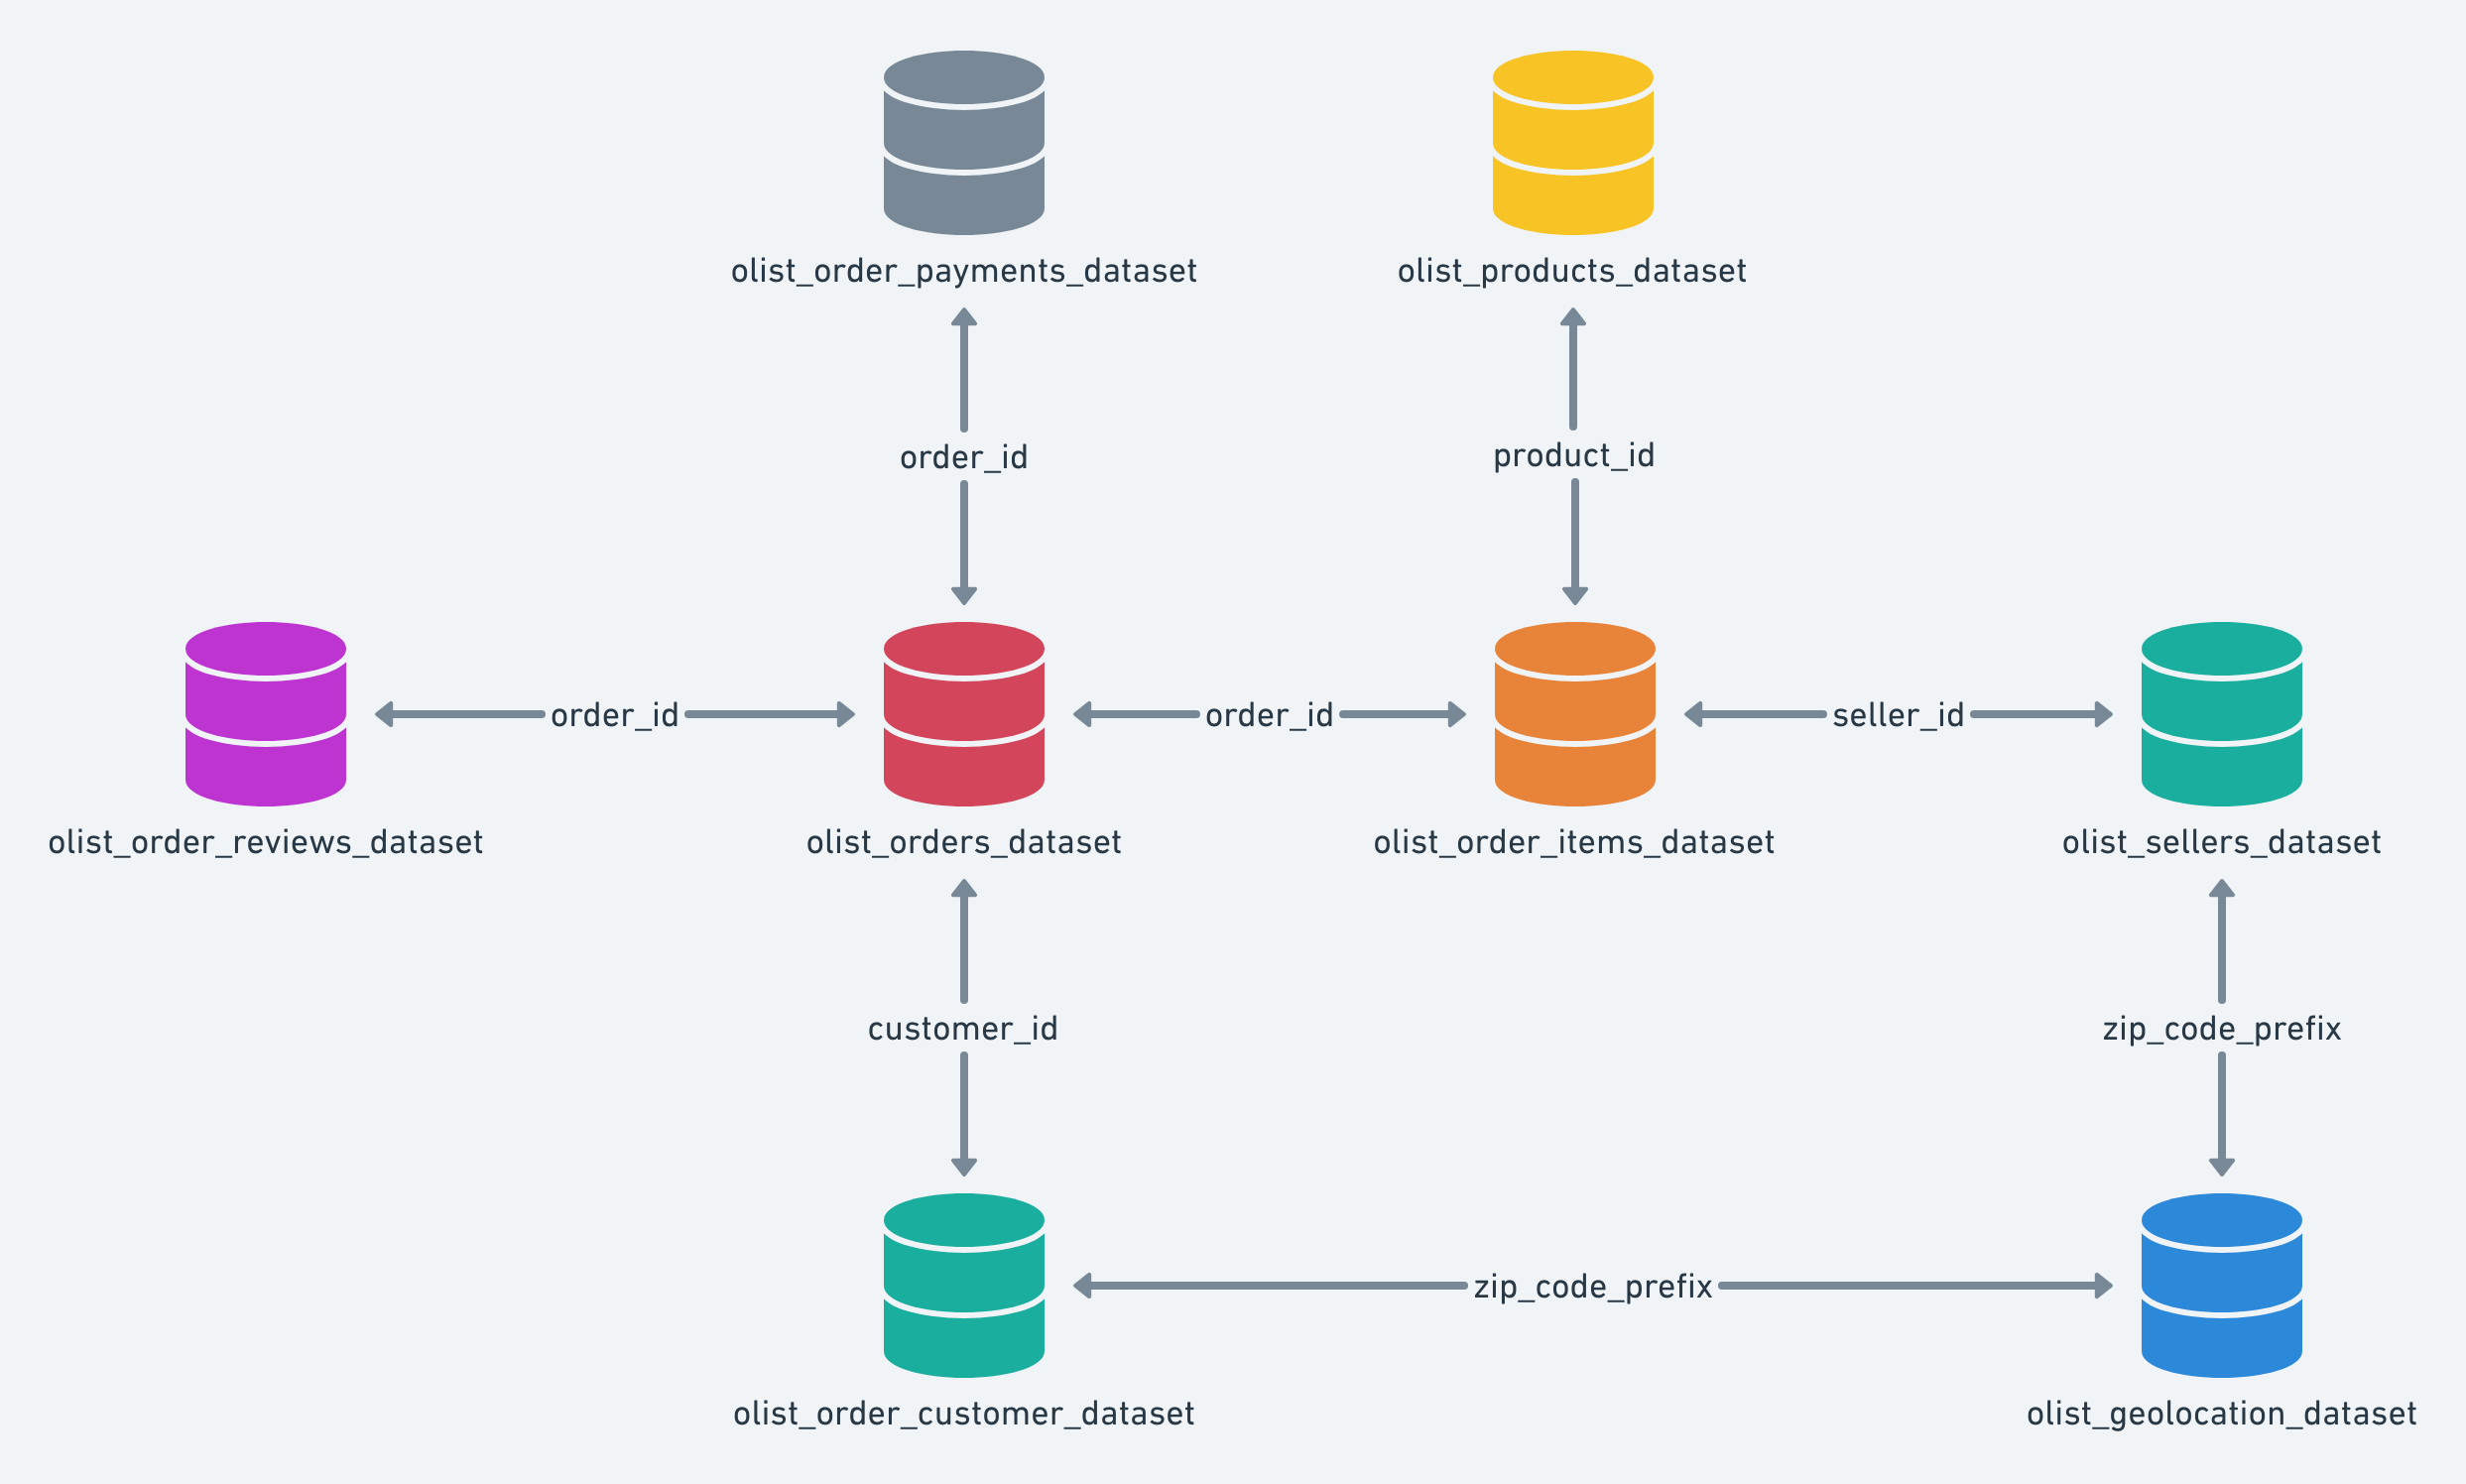

In [116]:
# Merging orders_df and orders_reviews_df

# first merge, or_df is a dataframe from merging orders_df and order_reviews
or_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')

# second merge, orp_df is a dataframe from merging or_df and order_payment_df
orp_df = pd.merge(or_df, order_payments_df, on='order_id', how='inner')

# third merge, orpc_df is a dataframe from merging orp_df and customer_df
orpc_df = pd.merge(orp_df, customers_df, on='customer_id', how='inner')

# last merge, df is a dataframe from merging orpc_df and order_item_df
df = pd.merge(orpc_df, order_item_df, on='order_id', how='inner')

# Note i didnt use geolocation_df, sellers_df, and product_df

In [117]:
pd.set_option('display.max_columns', None)
df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,transaction_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [118]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time_days', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'transaction_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [119]:
# Saving completed_df to csv file
df.to_csv('completed.csv', index=False)

In [120]:
import shutil
import os

# Path to the file
src_path = 'completed.csv'

# Destination folder (create folder if it doesn't exist)
destination_folder = 'data'
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Destination path (file will be moved to this folder)
dest_path = os.path.join(destination_folder, 'completed.csv')

# Move the file
shutil.move(src_path, dest_path)

print(f"File moved to: {dest_path}")

File moved to: data\completed.csv


**Insight:**
- Merging 9 dataset to be one dataset using inner join
- all_df have 42 column and 12338492 rows


## Visualization & Explanatory Analysis

In [181]:
df = pd.read_csv('data/completed.csv')

### Question 1: **Which 10 cities/provinces have the highest number of customers?**

In [207]:
top_10 = df['customer_city'].value_counts().head(10)
print(top_10)

customer_city
sao paulo                16438
rio de janeiro            6744
belo horizonte            2870
brasilia                  2152
curitiba                  1619
campinas                  1525
porto alegre              1393
guarulhos                 1241
salvador                  1217
sao bernardo do campo     1001
Name: count, dtype: int64


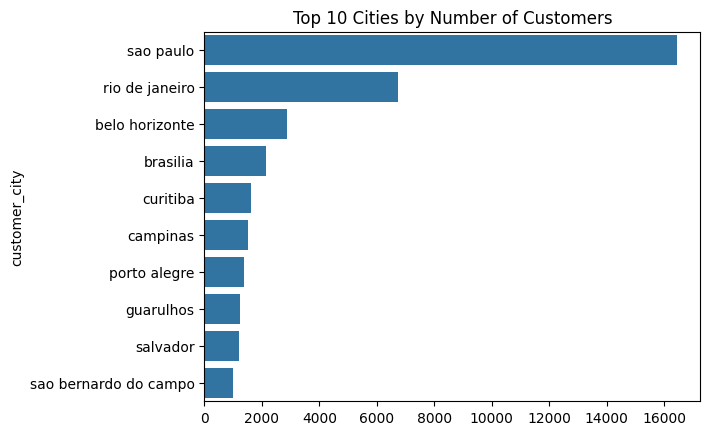

In [208]:
sns.barplot(x=top_10.values, y=top_10.index)
plt.title('Top 10 Cities by Number of Customers')
plt.show()

### Question 2: **What is the total transaction value (payment_value) based on the payment method?**

In [185]:
total_transaction = df.groupby('payment_type').agg({
    'transaction_value' : 'sum',
})

total_transaction

,transaction_value
payment_type,
boleto,3925614.42
credit_card,15100904.23
debit_card,246771.09
voucher,394220.94


Text(0, 0.5, '')

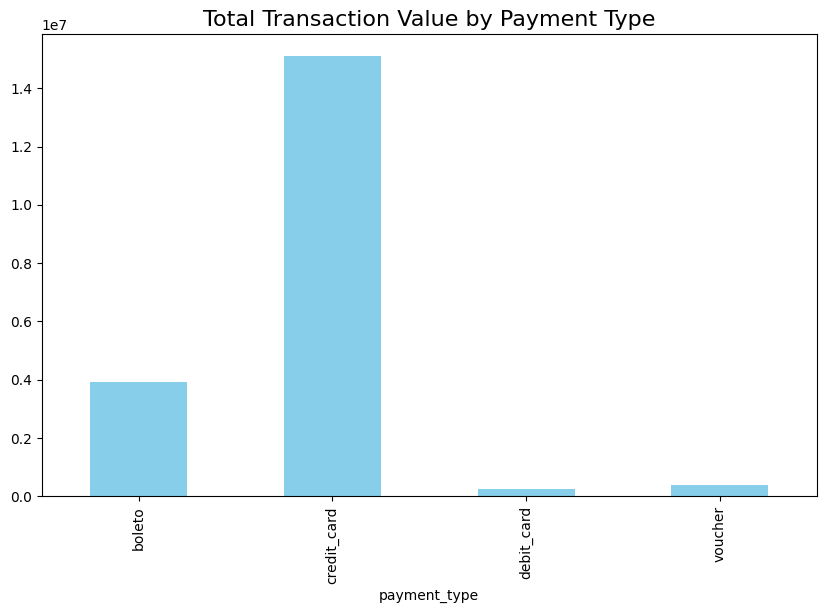

In [186]:
plt.figure(figsize=(10,6))
total_transaction['transaction_value'].plot(kind='bar', color='skyblue')
plt.title("Total Transaction Value by Payment Type", fontsize=16)
plt.xlabel("payment_type")
plt.ylabel('')

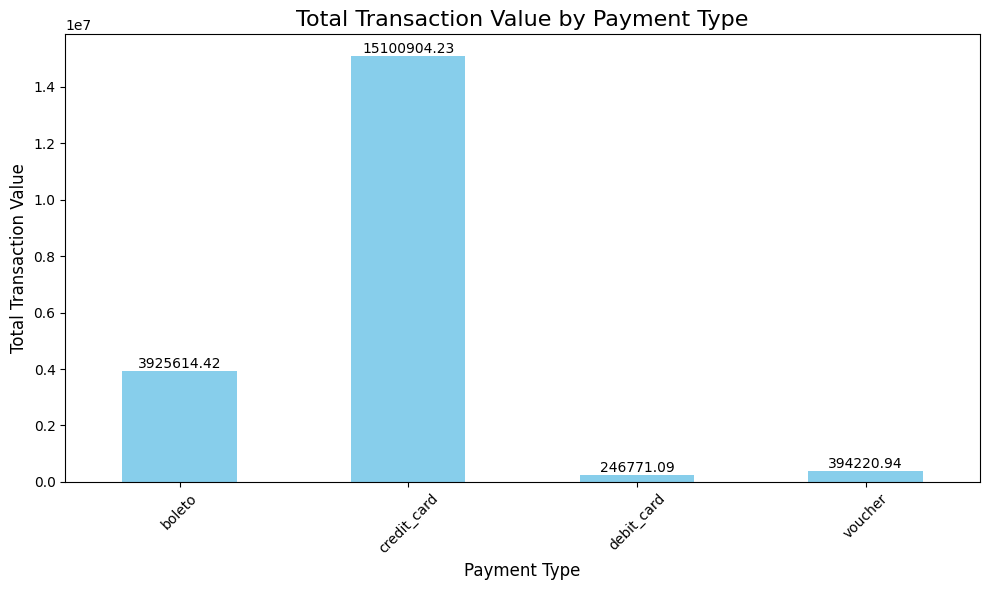

In [187]:
plt.figure(figsize=(10, 6))
total_transaction['transaction_value'].plot(kind='bar', color='skyblue')

plt.title("Total Transaction Value by Payment Type", fontsize=16)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Total Transaction Value", fontsize=12)

# Adding text labels on top of each bar
for index, value in enumerate(total_transaction['transaction_value']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

### Question 3: **what column has the best correlation value with review_score**

In [197]:
numerical_features = df.select_dtypes(['float','int'])

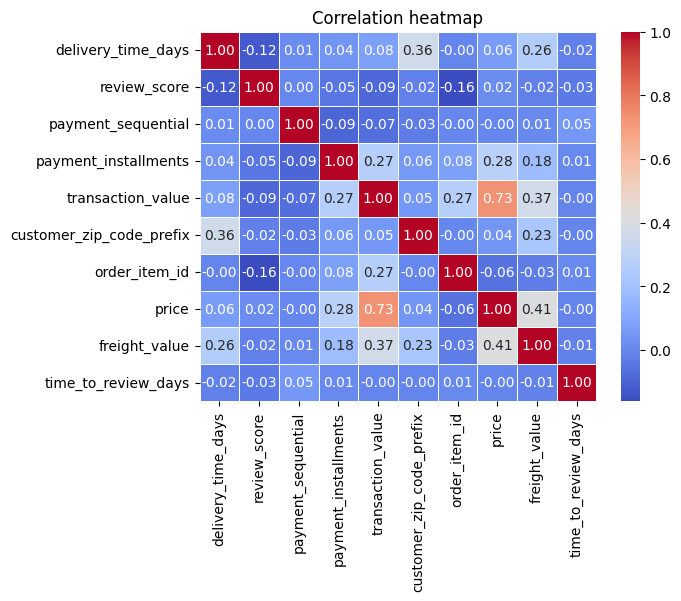

In [199]:

corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()

### Question 4: **What is the average time taken from order completion to review creation (order_delivered_customer_date to review_creation_date)?**

In [191]:
# change object to datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')

# create new column
df['time_to_review_days'] = (df['review_creation_date'] - df['order_delivered_customer_date']).dt.days

# count  average time dari from order delivered to review creation
average_time_to_review = df['time_to_review_days'].mean()

# show result
print(f"Average time taken from order completion to review creation: {average_time_to_review:.2f} days")


Average time taken from order completion to review creation: -0.50 days


In [192]:
negative_days = df[df['time_to_review_days'] < 0]
print(negative_days[['order_delivered_customer_date', 'review_creation_date', 'time_to_review_days']])

       order_delivered_customer_date review_creation_date  time_to_review_days
24               2017-10-09 22:23:46           2017-10-01                 -9.0
29               2018-03-21 22:03:54           2018-03-16                 -6.0
40               2018-03-20 00:59:25           2018-03-20                 -1.0
46               2017-12-28 18:59:23           2017-12-22                 -7.0
64               2017-04-06 13:37:16           2017-04-02                 -5.0
...                              ...                  ...                  ...
114632           2018-03-18 20:08:50           2018-03-07                -12.0
114646           2018-08-21 01:12:45           2018-08-16                 -6.0
114652           2018-02-08 15:46:34           2018-02-08                 -1.0
114791           2018-08-21 00:03:26           2018-08-18                 -4.0
114792           2018-08-21 00:03:26           2018-08-18                 -4.0

[9173 rows x 3 columns]


In [194]:
df = df[df['time_to_review_days'] >= 0]
average_time_to_review = df['time_to_review_days'].mean() 
print(f"Average time taken from order completion to review creation: {average_time_to_review:.2f} days")

Average time taken from order completion to review creation: 0.15 days


## Conclusion

- Based on the dataset, São Paulo and Rio de Janeiro are the top two cities with the highest number of customers, with São Paulo ranking first and Rio de Janeiro second.

This observation aligns with data from World Population Review, which indicates that São Paulo is the largest city in Brazil with a population of approximately 22.8 million in 2024, while Rio de Janeiro follows with around 13.8 million residents [World Population Review](https://worldpopulationreview.com/cities/brazil)​.

The high population density in these cities is reflected in their dominance in e-commerce transactions, as they house a large customer base, contributing significantly to Brazil's overall online marketplace activity.


- Based on the table, people prefer transactions using credit cards.
This can be seen from the fact that the largest transaction value is in the credit card payment type.

| payment_type 	| transaction_value 	|
|-------------:	|------------------:	|
|       boleto 	|        3925614.42 	|
|  credit_card 	|       15100904.23 	|
|   debit_card 	|         246771.09 	|
|      voucher 	|         394220.94 	|


- based on the values ​​in the correlation table, the one with the largest correlation value is `order_item_id`
- based on calculations that the average customer makes a review after **3.6 hours** after their order is completed
